#Step 1: **Loan_repay_credit based on Colletral conditon,Credit history  and Income level**

Consider three simple rules:

1. Colletral conditon bad and credit history bad and Income level is low **Then** Loan_repay_credit bad

2. Colletral conditon average and credit history good and Income level is medium **Then** Loan_repay_credit average

3. Colletral conditon good and credit history good and Income level is high **Then** Loan_repay_credit good 

# Input variables
Three inputs
- Colletral conditon
- Credit history
- Income level

# Output variable

The output variable is the Loan_repay_credit amount.


# Step 2: Import Packages

In [430]:
!pip install scikit-fuzzy  #Install the scikit-fuzzy package after that we can import
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Step 3: Generate universe variables



In [431]:
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
#     np.arange(start,stop,step)

x_colletral_conditon = np.arange(0, 11, 1)
x_credit_history= np.arange(0, 11, 1)
x_income_level= np.arange(0, 1001, 1)
x_Loan_repay_credit  = np.arange(0, 30, 1)

print(x_income_level)

[   0    1    2 ...  998  999 1000]


# Step 4: Generate fuzzy membership functions



Triangular membership function (trinmf) is used for fuzzification of the variables 
- Colletral conditon
  - Bad
  - Average
  - Good
- Credit history 
  - Bad
  - Average 
  - Good
- Income level
  - low
  - medium 
  - high
- Loan_repay_credit 
  - Bad
  - Average 
  - Good

- Triangular membership function Formula 
  <img src="https://github.com/DrUzair/KES/blob/master/fuzzy_logic/images/trimf.png?raw=true" width="300">

  - [abc] 
  - $a \le b \le c$ 
  - zero for $x \le a$ and $x \ge  c$
  - increases a to b
  - decreases b to c

In [432]:
# Generate fuzzy membership functions
# Colletral conditon
colletral_conditon_bad = fuzz.trimf(x_colletral_conditon, abc=[0, 0, 5])
colletral_conditon_avg = fuzz.trimf(x_colletral_conditon, abc=[0, 5, 10])
colletral_conditon_good = fuzz.trimf(x_colletral_conditon, abc=[5, 10, 10])
# Credit history
credit_history_bad = fuzz.trimf(x_credit_history, abc=[0, 0, 5])
credit_history_avg = fuzz.trimf(x_credit_history, abc=[0, 5, 10])
credit_history_good = fuzz.trimf(x_credit_history, abc=[5, 10, 10])
# Income level
income_level_lo = fuzz.trimf(x_income_level, abc=[0, 0, 500])
income_level_md = fuzz.trimf(x_income_level, abc=[0, 500, 1000])
income_level_hi = fuzz.trimf(x_income_level, abc=[500, 1000, 1000])
# Loan_repay_credit
Loan_repay_credit_bad = fuzz.trimf(x_Loan_repay_credit, abc=[0, 0, 15])
Loan_repay_credit_avg = fuzz.trimf(x_Loan_repay_credit, abc=[0, 15, 30])
Loan_repay_credit_good = fuzz.trimf(x_Loan_repay_credit, abc=[15, 30, 30])

print(income_level_lo)

[1.    0.998 0.996 ... 0.    0.    0.   ]


Have a look on the colletral conditon membership functions for bad, average and good

In [433]:
print('x_colletral_conditon',x_colletral_conditon)
print('colletral_conditon_bad',colletral_conditon_bad)
print('colletral_conditon_avg',colletral_conditon_avg)
print('colletral_conditon_good',colletral_conditon_good)

x_colletral_conditon [ 0  1  2  3  4  5  6  7  8  9 10]
colletral_conditon_bad [1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]
colletral_conditon_avg [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]
colletral_conditon_good [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


The triangular membership function

# Step 5:Visualize these universes and membership functions

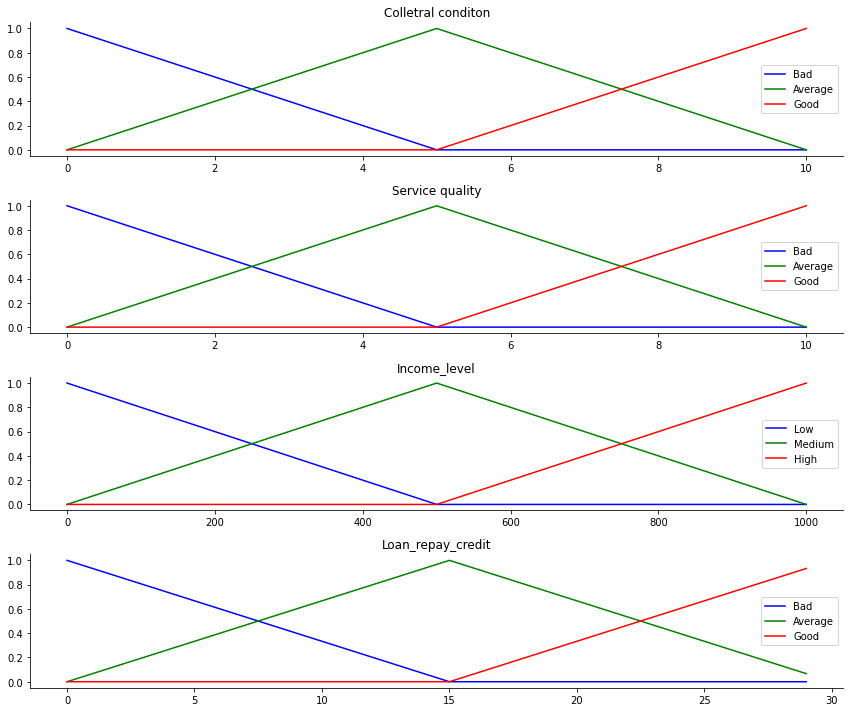

In [434]:
# Visualize these universes and membership functions
fig, (colletral_conditon_graph, credit_history_graph, income_level_graph,Loan_repay_credit_graph) = plt.subplots(nrows=4, figsize=(12, 10))

colletral_conditon_graph.plot(x_colletral_conditon, colletral_conditon_bad, 'b', linewidth=1.5, label='Bad')
colletral_conditon_graph.plot(x_colletral_conditon, colletral_conditon_avg, 'g', linewidth=1.5, label='Average')
colletral_conditon_graph.plot(x_colletral_conditon, colletral_conditon_good, 'r', linewidth=1.5, label='Good')
colletral_conditon_graph.set_title('Colletral conditon')
colletral_conditon_graph.legend()

credit_history_graph.plot(x_credit_history, credit_history_bad, 'b', linewidth=1.5, label='Bad')
credit_history_graph.plot(x_credit_history, credit_history_avg, 'g', linewidth=1.5, label='Average')
credit_history_graph.plot(x_credit_history, credit_history_good, 'r', linewidth=1.5, label='Good')
credit_history_graph.set_title('Service quality')
credit_history_graph.legend()

income_level_graph.plot(x_income_level, income_level_lo, 'b', linewidth=1.5, label='Low')
income_level_graph.plot(x_income_level, income_level_md, 'g', linewidth=1.5, label='Medium')
income_level_graph.plot(x_income_level, income_level_hi, 'r', linewidth=1.5, label='High')
income_level_graph.set_title('Income_level')
income_level_graph.legend()

Loan_repay_credit_graph.plot(x_Loan_repay_credit, Loan_repay_credit_bad, 'b', linewidth=1.5, label='Bad')
Loan_repay_credit_graph.plot(x_Loan_repay_credit, Loan_repay_credit_avg, 'g', linewidth=1.5, label='Average')
Loan_repay_credit_graph.plot(x_Loan_repay_credit, Loan_repay_credit_good, 'r', linewidth=1.5, label='Good')
Loan_repay_credit_graph.set_title('Loan_repay_credit')
Loan_repay_credit_graph.legend()

# Turn off top/right axes
for ax in (colletral_conditon_graph, credit_history_graph, income_level_graph,Loan_repay_credit_graph):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


plt.tight_layout()

# Fuzzy Rule based Loan Repay Credit 

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:


1. Colletral conditon bad and credit history bad and Income level is low **Then** Loan_repay_credit bad

2. Colletral conditon average and credit history good and Income level is medium **Then** Loan_repay_credit average

3. Colletral conditon good and credit history good and Income level is high **Then** Loan_repay_credit good 







Question 1
What would the Loan Repay Credit be in the following circumstance:

Colletral conditon was 5.5
credit history was 8
Income level was 510

# Step 6: Fuzzification: interp_membership function
Find the degree of membership u(xx) for a given value of x = xx.
We need the activation of our fuzzy membership functions at these values.
The exact values 5.5,8 and 510 do not exist on our universes...
This is what fuzz.interp_membership exists for!

In [435]:
#Case for Medium 
colletral_conditon_value=5.5
credit_history_value=8
income_level_value=510

In [436]:
colletral_conditon_bad = fuzz.interp_membership(x_colletral_conditon, colletral_conditon_bad, colletral_conditon_value)
colletral_conditon_avg = fuzz.interp_membership(x_colletral_conditon, colletral_conditon_avg, colletral_conditon_value)
colletral_conditon_good = fuzz.interp_membership(x_colletral_conditon, colletral_conditon_good, colletral_conditon_value)
print(colletral_conditon_bad, colletral_conditon_avg, colletral_conditon_good)

0.0 0.9 0.1


In [437]:
credit_history_bad = fuzz.interp_membership(x_credit_history, credit_history_bad, credit_history_value)
credit_history_avg = fuzz.interp_membership(x_credit_history, credit_history_avg, credit_history_value)
credit_history_good = fuzz.interp_membership(x_credit_history, credit_history_good,credit_history_value)
print(credit_history_bad, credit_history_avg, credit_history_good)

0.0 0.4 0.6


In [438]:
income_level_lo = fuzz.interp_membership(x_income_level, income_level_lo, income_level_value)
income_level_md = fuzz.interp_membership(x_income_level, income_level_md, income_level_value)
income_level_hi = fuzz.interp_membership(x_income_level, income_level_hi, income_level_value)
print(income_level_lo, income_level_md, income_level_hi)

0.0 0.98 0.02


# Step 7: Rule Evaluation (Inference)
1. Colletral conditon bad and Credit history bad and Income level is low Then Loan_repay_credit bad

In [439]:
import math 

active_rule1 = np.fmin(colletral_conditon_bad, np.fmin(credit_history_bad,income_level_lo)) # fuzzy-min = Boolean AND
print('active_rule1', active_rule1)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
print(Loan_repay_credit_bad.round(2))
Loan_repay_credit_activation_bad = np.fmin(active_rule1, Loan_repay_credit_bad)  # fuzzy-min = Boolean AND
print(Loan_repay_credit_activation_bad)

active_rule1 0.0
[1.   0.93 0.87 0.8  0.73 0.67 0.6  0.53 0.47 0.4  0.33 0.27 0.2  0.13
 0.07 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


2. Colletral conditon average and credit history good and Income level is mediumThen Loan_repay_credit average


In [440]:
active_rule2 = np.fmin(colletral_conditon_avg, np.fmin(credit_history_good,income_level_md)) # fuzzy-min = Boolean AND
print('active_rule2', active_rule2)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
print(Loan_repay_credit_avg.round(2))
Loan_repay_credit_activation_avg = np.fmin(active_rule2, Loan_repay_credit_avg)  # fuzzy-min = Boolean AND
print(Loan_repay_credit_activation_avg)

active_rule2 0.6
[0.   0.07 0.13 0.2  0.27 0.33 0.4  0.47 0.53 0.6  0.67 0.73 0.8  0.87
 0.93 1.   0.93 0.87 0.8  0.73 0.67 0.6  0.53 0.47 0.4  0.33 0.27 0.2
 0.13 0.07]
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.53333333 0.46666667
 0.4        0.33333333 0.26666667 0.2        0.13333333 0.06666667]


3. Colletral conditon good and credit history good and Income level is high Then Loan_repay_credit good 

In [441]:
active_rule3 = np.fmin(colletral_conditon_good, np.fmin(credit_history_good,income_level_hi)) # fuzzy-min = Boolean AND
print('active_rule3', active_rule3)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
print(Loan_repay_credit_good.round(2))
Loan_repay_credit_activation_good = np.fmin(active_rule3, Loan_repay_credit_good)  # fuzzy-min = Boolean AND
print(Loan_repay_credit_activation_good)

active_rule3 0.02
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.07 0.13 0.2  0.27 0.33 0.4  0.47 0.53 0.6  0.67 0.73 0.8
 0.87 0.93]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02]


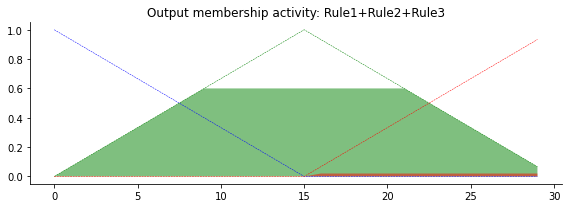

In [442]:
Loan_repay_credit0 = np.zeros_like(x_Loan_repay_credit)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x=x_Loan_repay_credit, y1=Loan_repay_credit0, y2=Loan_repay_credit_activation_bad, facecolor='b', alpha=0.5)
ax0.plot(x_Loan_repay_credit, Loan_repay_credit_bad, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(x_Loan_repay_credit, Loan_repay_credit0, Loan_repay_credit_activation_avg, facecolor='g', alpha=0.5)
ax0.plot(x_Loan_repay_credit, Loan_repay_credit_avg, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_Loan_repay_credit, Loan_repay_credit0, Loan_repay_credit_activation_good, facecolor='r', alpha=0.5)
ax0.plot(x_Loan_repay_credit, Loan_repay_credit_good, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity: Rule1+Rule2+Rule3')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Step 8: Aggregation (Composition)

- Aggregate all three output membership functions together

In [443]:
  aggregated = np.fmax(Loan_repay_credit_activation_bad, np.fmax(Loan_repay_credit_activation_avg, Loan_repay_credit_activation_good))
  print(aggregated)

[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.53333333 0.46666667
 0.4        0.33333333 0.26666667 0.2        0.13333333 0.06666667]


# Step 9: Defuzzification
Calculate defuzzified result using the centroid method


In [444]:
Loan_repay_credit = fuzz.defuzz(x_Loan_repay_credit, aggregated, 'centroid')
print(Loan_repay_credit)

14.961980548187451


# Step 10: Visualization of outcome

In [445]:
Loan_repay_credit_activation = fuzz.interp_membership(x_Loan_repay_credit, aggregated, Loan_repay_credit)  # for plot
Loan_repay_credit_activation

0.6

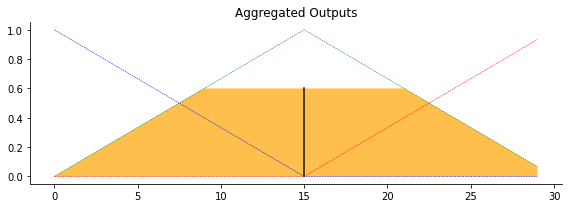

In [446]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_Loan_repay_credit, Loan_repay_credit_bad, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_Loan_repay_credit, Loan_repay_credit_avg, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_Loan_repay_credit, Loan_repay_credit_good, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_Loan_repay_credit, Loan_repay_credit0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([Loan_repay_credit, Loan_repay_credit], [0, Loan_repay_credit_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Outputs')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()